In [1]:
from timecave.data_generation import time_series_functions as tsf
from timecave.data_generation import time_series_generation as tsg
from timecave.data_generation import _utils as dgu
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# DGP 1 and 2

In [2]:
def create_df_from_array(arr):
    df = pd.DataFrame(np.array(arr).T)
    df = df.reset_index(drop=False, names=["Timestep"])
    return df

In [3]:
samples = 200

In [4]:
s1_parameters = {
    'lags': 3,
    'max_root': 1.2,
    'ar': True,
    'ma': False,
    }

s2_parameters = {
    'lags': 1,
    'max_root': 1.2,
    'ar': False,
    'ma': True,
    }


In [5]:
g1 = tsg.TimeSeriesGenerator(
    length = samples,
    noise_level=0,
    functions = [tsf.arma_ts], 
    parameter_values = [s1_parameters]
    )
arr1 = g1.generate(1000, og_seed=1)

## Plot 1

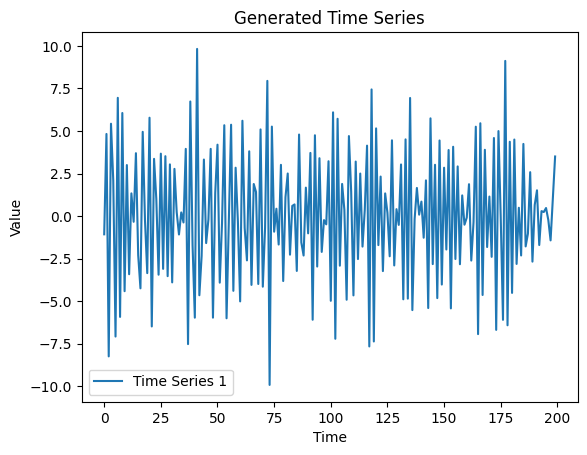

In [6]:
g1.plot(1)

In [7]:
g2 = tsg.TimeSeriesGenerator(
    length = samples,
    noise_level=0,
    functions = [tsf.arma_ts], 
    parameter_values = [s2_parameters]
    )
arr2 = g2.generate(1000, og_seed=1)

## Plot 2

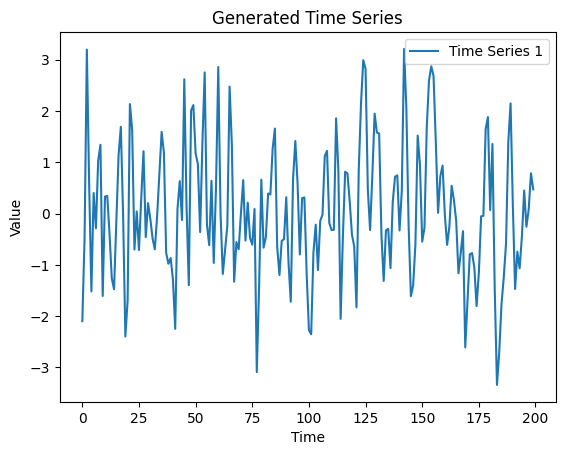

In [8]:
g2.plot(1)

In [9]:
df1 = create_df_from_array(arr1)
df1.to_csv('datasets/synthetic_data/s1.csv', index=False)

In [10]:
df1

,Timestep,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,-1.056012,-1.069276,0.656725,-0.650998,-1.168900,-1.508087,-0.801142,-0.739861,0.072279,...,-0.796790,-0.954068,2.216394,-0.170095,2.687883,-0.281201,-0.257671,0.759529,0.853132,-1.826581
1,1,-1.900906,4.826704,-0.784337,-0.253360,-1.385578,1.915626,-0.543302,2.192880,1.153504,...,0.185367,-0.154173,-4.651524,0.861912,-8.865502,-1.187899,-0.455867,2.626061,-1.547526,-6.078205
2,2,-1.292813,-8.241436,-1.759563,1.535479,1.712357,0.443140,2.451996,-1.583611,-0.561204,...,2.096735,1.956917,2.330328,1.107327,10.717738,0.994559,-0.568998,0.413537,-0.334163,-5.930400
3,3,-0.965455,5.428429,4.508451,1.132189,2.367099,-1.565461,-1.195093,0.188181,-2.334133,...,0.522349,0.618547,-0.151671,-1.988670,-5.072633,2.124885,-1.502977,-2.020295,3.203489,-0.050282
4,4,0.200221,2.093039,-3.682721,-1.244285,-1.208396,2.091983,-1.894719,-1.094990,1.698889,...,-1.605148,-1.415633,2.280593,0.239952,0.523440,-1.366470,-0.094582,-1.283671,-3.124575,3.110944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-0.728415,0.475894,-2.348147,1.453920,0.504034,-1.262717,1.046288,-0.217184,-0.200963,...,1.658536,3.873572,-1.464630,1.400526,-2.246193,0.696378,2.384164,-1.097242,-7.598666,3.091143
196,196,-0.938638,-0.226599,2.160925,-0.115128,1.679529,0.765390,-0.667515,-0.690859,1.627057,...,1.291930,2.673984,4.090428,1.679549,2.841668,2.664157,-1.889807,-1.474191,7.308503,-0.997014
197,197,0.847157,-1.426000,-1.705589,-1.856327,-0.206018,0.983153,-0.677163,-0.430708,-0.017304,...,0.721686,-4.335411,-3.429567,-1.243909,-2.980139,-0.553605,-2.539234,0.103788,-5.650796,0.986650
198,198,0.776652,1.004371,2.733982,-0.456194,-0.328761,-1.554136,-0.800343,2.668380,1.292478,...,-0.362456,-3.935814,0.574435,1.457810,-1.523674,-2.270895,3.268665,0.278929,2.785294,5.858420


In [11]:
df2 = create_df_from_array(arr2)
df2.to_csv('datasets/synthetic_data/s2.csv', index=False)
df2

,Timestep,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,0.926383,-2.097939,1.061691,0.380102,-1.014517,-0.492329,-0.285303,-0.716828,0.917567,...,-0.607462,-1.615914,0.195763,-0.370551,0.025507,-0.641410,-3.096075,1.073954,-1.313706,-1.001097
1,1,-1.563582,-0.456931,1.117467,-1.102608,0.261896,0.148633,-3.623814,-2.273379,0.572498,...,-1.104124,0.278480,-0.617566,-0.140721,-1.115381,-0.323494,2.295944,-1.289473,-2.848914,1.663831
2,2,1.338804,3.195100,0.407555,-0.421274,1.068762,0.005638,-3.915509,0.965070,-0.770377,...,-0.192544,-0.456035,-1.403328,1.440043,-1.553390,1.265504,-0.729017,-0.035007,-3.683486,-1.333935
3,3,0.661850,0.605901,1.141674,0.334118,-0.250422,0.060037,-0.953451,2.228108,0.112870,...,2.392868,1.080055,-1.222187,1.558689,-1.104472,-1.063031,2.701144,-0.186419,-0.571259,1.743733
4,4,-2.370983,-1.517297,1.154865,-1.145954,-1.351221,-0.578685,-0.136949,1.036088,-0.081974,...,0.269320,-0.897403,-0.999321,0.210304,-2.805097,-0.091506,0.175828,2.292585,-0.050321,1.155351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.416472,0.449046,-1.937080,-0.898936,-0.114644,0.683433,1.491317,-1.524509,1.364847,...,1.212356,0.685475,2.272656,0.886633,0.383333,-1.766575,0.982556,0.889582,1.205266,0.324124
196,196,0.834666,-0.255359,0.918768,0.703513,-0.697410,1.022018,0.243812,-0.514873,-0.689360,...,1.065147,-1.468121,0.429222,-0.470131,1.023626,-0.285411,-0.398386,0.150029,0.541924,-1.052162
197,197,-1.035069,0.080940,2.880600,-0.737966,2.345990,-0.636003,-1.738759,1.250164,-0.617182,...,0.318877,1.921284,-0.009655,-1.326151,-0.589004,-0.098647,-0.467268,1.434909,0.322537,0.382299
198,198,-0.214341,0.785245,0.336159,0.193352,-1.686089,-0.952226,-0.770303,2.390332,0.922399,...,-0.984964,-0.277268,-1.330255,-0.116515,-0.433105,0.366454,-0.488772,-0.037203,1.445498,0.460442


# DGP 3

In [12]:
length=200
seed=2

#Data
data = pd.read_csv('datasets/other/accidental-deaths-in-usa-monthly.csv', usecols=[1], names = ['accidental_deaths'], skiprows=1)
ts = data.accidental_deaths.to_numpy()
ts

array([ 9007,  8106,  8928,  9137, 10017, 10826, 11317, 10744,  9713,
        9938,  9161,  8927,  7750,  6981,  8038,  8422,  8714,  9512,
       10120,  9823,  8743,  9129,  8710,  8680,  8162,  7306,  8124,
        7870,  9387,  9556, 10093,  9620,  8285,  8433,  8160,  8034,
        7717,  7461,  7776,  7925,  8634,  8945, 10078,  9179,  8037,
        8488,  7874,  8647,  7792,  6957,  7726,  8106,  8890,  9299,
       10625,  9302,  8314,  8850,  8265,  8796,  7836,  6892,  7791,
        8129,  9115,  9434, 10484,  9827,  9110,  9070,  8633,  9240],
      dtype=int64)

In [13]:
def simulate_from_data(number_samples:int, ts: np.array, seed: int=None):
    sar = SARIMAX(ts, order=(1, 0, 0), seasonal_order = (0, 0, 0, 12))
    sar_fit = sar.fit()

    ts_sar = sar_fit.simulate(number_samples, random_state=seed)

    return ts_sar

#Simulation
results =  simulate_from_data(200, ts, seed=None)

In [14]:
s3_parameters = {
    'ts': ts,
    'seed' : None
    }

g3 = tsg.TimeSeriesGenerator(
    length = samples,
    noise_level=0,
    functions = [simulate_from_data], 
    parameter_values = [s3_parameters]
    )



arr3 = g3.generate(1000, og_seed=1)

In [15]:
df3 = create_df_from_array(arr3)

In [16]:
df3

,Timestep,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,15102.263571,-11380.034877,419.206016,13277.646708,1776.913454,7666.260707,2972.413605,-4032.783644,-6101.854271,...,-7833.887933,-18794.051644,-6830.208333,17162.496686,1588.346116,9834.897894,-9565.838680,-10081.399858,-2766.832066,-6780.348781
1,1,14303.846133,-11623.357191,-350.402109,13163.407309,2404.455533,7090.579050,2823.562038,-4109.386184,-6981.782739,...,-7638.914953,-18584.558809,-7148.715515,17360.005163,967.455900,8629.522038,-9905.406159,-10051.046843,-2849.023623,-6357.400336
2,2,14636.881178,-11397.612487,-436.107170,14308.233364,2675.404409,6975.257935,3419.556057,-4815.087597,-6170.627824,...,-8117.970023,-19226.889145,-7951.965720,17493.595284,2224.951345,7645.938856,-10665.499945,-10414.018438,-2743.728676,-7045.741084
3,3,14780.250147,-11991.436578,-589.841430,14293.684648,3854.361959,6973.127634,4855.111755,-6249.353182,-6180.801575,...,-7757.913381,-19393.759877,-8471.832841,17563.121062,1387.769772,6907.556884,-8245.285369,-10966.803634,-2003.865734,-7171.619335
4,4,14834.567563,-12200.596062,-34.268875,13826.505916,4112.198659,7183.999941,3454.116189,-6915.666243,-5789.367317,...,-8845.594478,-17962.262115,-9015.911106,18375.198552,1691.414072,7023.723091,-8412.944062,-11117.160969,-2645.152617,-7210.577685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-1051.088100,-20290.530912,-739.735078,2542.695903,7504.145213,4175.043260,-5376.696705,-11857.994179,-13840.318594,...,-543.613233,-5114.935313,-2228.309699,-6044.685791,5766.356567,8604.012772,11680.144725,3909.414698,13440.539662,-9704.958759
196,196,-331.237898,-20088.608838,-543.915082,2274.681999,7199.663536,5168.159338,-4539.133484,-11521.433921,-15537.979534,...,-1512.599729,-5513.941064,-4516.020896,-6133.454917,5508.270095,7759.429628,12825.476575,3063.765134,12411.530980,-11702.594105
197,197,-1862.365800,-19938.192306,-1632.875413,2522.817212,6188.856873,6182.663771,-4694.776775,-11699.339042,-16148.505341,...,-1624.235581,-5291.223951,-4524.363162,-6320.533190,6076.441255,7550.159475,12276.036724,4315.714656,11387.493271,-12309.688110
198,198,-2626.467750,-19693.538253,-1492.640618,3069.519857,5417.724947,6318.586382,-3736.486323,-12436.486376,-16535.664413,...,-1736.169501,-5730.174226,-6555.548543,-6410.011219,6140.247229,6600.486860,12225.019270,5414.257056,12368.650020,-12655.593875


In [17]:
df3.to_csv('datasets/synthetic_data/s3.csv', index=False)

## Plot 3

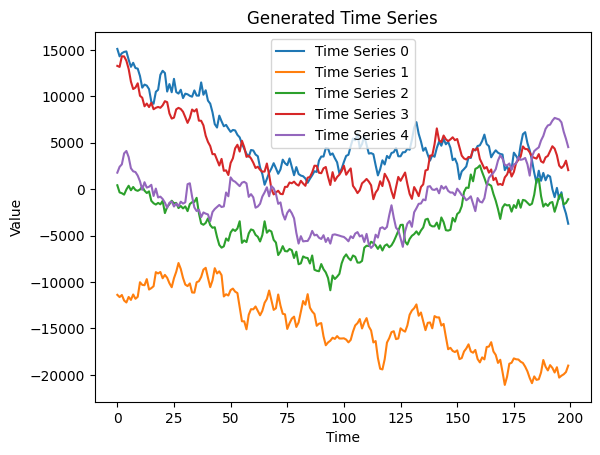

In [18]:
g3.plot(range(5))